# Day 08. Exercise 04
# Regression

## 0. Imports

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [57]:
df = pd.read_csv("../data/checker_regression.csv")

In [58]:
df = df.fillna(0)

df = df.drop_duplicates()
df = df.drop(columns=['uid'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 76
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 928.0 bytes


In [60]:
df.head(15)

,num_commits,pageviews,AVG(diff)
0,62,28.0,0.000000
6,20,89.0,0.000000
12,7,0.0,-2.000000
13,86,0.0,-89.000000
14,52,0.0,-48.500000
15,61,143.0,0.000000
19,23,0.0,-17.500000
20,41,0.0,-39.333333
21,51,47.0,0.000000
27,5,3.0,0.000000


In [61]:
X = df.drop(columns=['AVG(diff)'])
y = df['AVG(diff)']

In [62]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [63]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    rmses_train, rmses_test = [], []

    for train_idx, test_idx in kf.split(X):
        X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_tr, y_tr)

        y_pred_train = model.predict(X_tr)
        y_pred_test = model.predict(X_te)

        rmse_train = np.sqrt(mean_squared_error(y_tr, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_te, y_pred_test))

        print(f"train - {rmse_train}   |   test - {rmse_test}")

        rmses_train.append(rmse_train)
        rmses_test.append(rmse_test)

    avg_rmse = np.mean(rmses_test)
    print(f"Average RMSE on crossval is {avg_rmse}")
    return rmses_train, rmses_test, avg_rmse


In [64]:
print("Linear Regression")
crossval(10, X, y, LinearRegression())

Linear Regression
train - 61.35327112662008   |   test - 57.85614740884658
train - 62.5462335194863   |   test - 44.71218893425673
train - 61.14556371253599   |   test - 83.19897138394585
train - 58.416728626194235   |   test - 79.399015977114
train - 60.11026827841826   |   test - 68.75614618929599
train - 60.619323028395335   |   test - 65.92296908962915
train - 61.72075104991357   |   test - 61.8003605530157
train - 62.60680682836641   |   test - 46.68994292992783
train - 55.58034321272078   |   test - 99.08124434288634
train - 61.57793245106181   |   test - 53.24118830442656
Average RMSE on crossval is 66.06581751133447


([np.float64(61.35327112662008),
  np.float64(62.5462335194863),
  np.float64(61.14556371253599),
  np.float64(58.416728626194235),
  np.float64(60.11026827841826),
  np.float64(60.619323028395335),
  np.float64(61.72075104991357),
  np.float64(62.60680682836641),
  np.float64(55.58034321272078),
  np.float64(61.57793245106181)],
 [np.float64(57.85614740884658),
  np.float64(44.71218893425673),
  np.float64(83.19897138394585),
  np.float64(79.399015977114),
  np.float64(68.75614618929599),
  np.float64(65.92296908962915),
  np.float64(61.8003605530157),
  np.float64(46.68994292992783),
  np.float64(99.08124434288634),
  np.float64(53.24118830442656)],
 np.float64(66.06581751133447))

In [65]:
print("\nDecision Tree Regressor")
crossval(10, X, y, DecisionTreeRegressor(max_depth=5, random_state=21))


Decision Tree Regressor
train - 19.51853504928291   |   test - 120.62116123233534
train - 13.810879405644846   |   test - 79.5333147061541
train - 24.668873948365416   |   test - 0.0
train - 24.61110834249758   |   test - 78.98656472722058
train - 7.999221716949911   |   test - 96.70180443756715
train - 15.988261168504463   |   test - 53.91636704579294
train - 24.668873948365416   |   test - 0.0
train - 20.545808925984808   |   test - 56.383024650598514
train - 23.16474904441225   |   test - 114.38661254547942
train - 22.13969671838106   |   test - 40.58792924010783
Average RMSE on crossval is 64.1116778585256


([np.float64(19.51853504928291),
  np.float64(13.810879405644846),
  np.float64(24.668873948365416),
  np.float64(24.61110834249758),
  np.float64(7.999221716949911),
  np.float64(15.988261168504463),
  np.float64(24.668873948365416),
  np.float64(20.545808925984808),
  np.float64(23.16474904441225),
  np.float64(22.13969671838106)],
 [np.float64(120.62116123233534),
  np.float64(79.5333147061541),
  np.float64(0.0),
  np.float64(78.98656472722058),
  np.float64(96.70180443756715),
  np.float64(53.91636704579294),
  np.float64(0.0),
  np.float64(56.383024650598514),
  np.float64(114.38661254547942),
  np.float64(40.58792924010783)],
 np.float64(64.1116778585256))

In [66]:
print("\nRandom Forest Regressor")
crossval(10, X, y, RandomForestRegressor(n_estimators=100, max_depth=10, random_state=21))


Random Forest Regressor
train - 20.920695939881494   |   test - 97.50335139862099
train - 22.513709875327706   |   test - 78.01690371916807
train - 26.45753874793136   |   test - 20.678674351271315
train - 24.801579078915356   |   test - 56.688591592495406
train - 22.400454654459477   |   test - 77.74492463343996
train - 23.84950304426348   |   test - 53.93331786876579
train - 24.960042347292447   |   test - 8.141221739804578
train - 24.33125738694806   |   test - 57.41679402832187
train - 21.748562307626617   |   test - 91.24344940546369
train - 26.400345641306533   |   test - 32.155805517822095
Average RMSE on crossval is 57.35230342551737


([np.float64(20.920695939881494),
  np.float64(22.513709875327706),
  np.float64(26.45753874793136),
  np.float64(24.801579078915356),
  np.float64(22.400454654459477),
  np.float64(23.84950304426348),
  np.float64(24.960042347292447),
  np.float64(24.33125738694806),
  np.float64(21.748562307626617),
  np.float64(26.400345641306533)],
 [np.float64(97.50335139862099),
  np.float64(78.01690371916807),
  np.float64(20.678674351271315),
  np.float64(56.688591592495406),
  np.float64(77.74492463343996),
  np.float64(53.93331786876579),
  np.float64(8.141221739804578),
  np.float64(57.41679402832187),
  np.float64(91.24344940546369),
  np.float64(32.155805517822095)],
 np.float64(57.35230342551737))

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [67]:
linreg = LinearRegression()
dt = DecisionTreeRegressor(max_depth=5, random_state=21)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=21)

models = {
    "Linear Regression": linreg,
    "Decision Tree": dt,
    "Random Forest": rf
}

In [68]:
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred


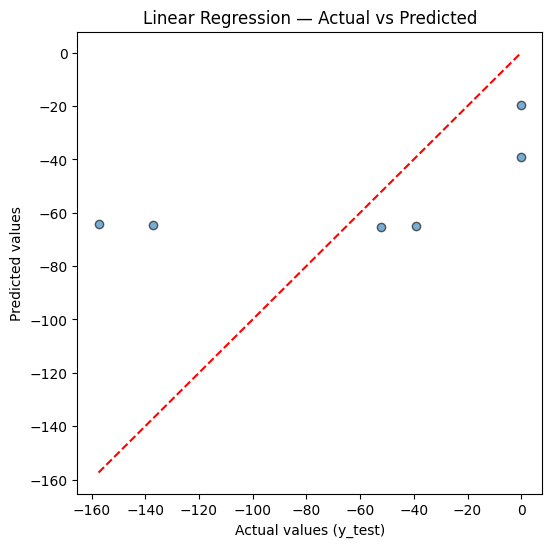

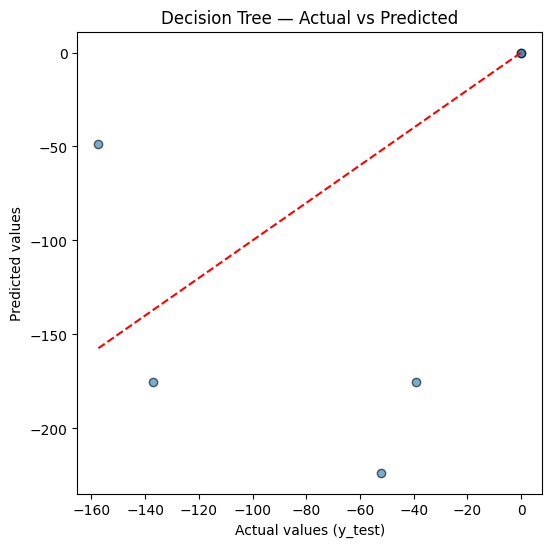

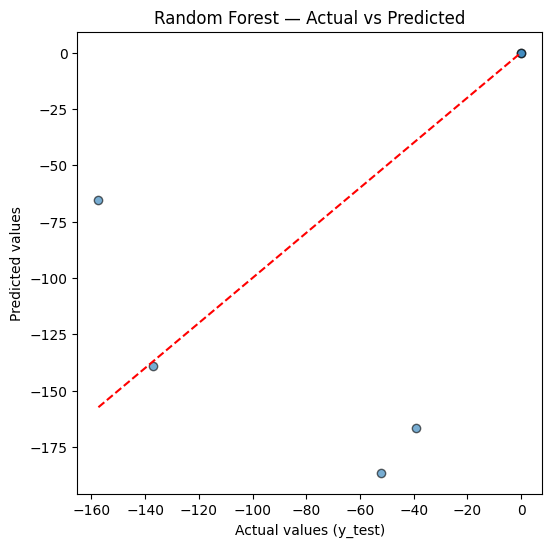

In [69]:
for name, y_pred in predictions.items():
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual values (y_test)")
    plt.ylabel("Predicted values")
    plt.title(f"{name} — Actual vs Predicted")
    plt.show()


## How would plot look like in the ideal case? - **Diagonal**